# Zomato Data Analysis Using Python

# Step 1: Import necessary Python libraries.

In [1]:
pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Defination:

## pandas is used for data manipulation and analysis.

## numpy is used for numerical operations.

## matplotlib.pyplot and seaborn are used for data visualization.

# Step 2: Create the data frame.

In [3]:
dataframe=pd.read_excel('Zomatodatabase.xlsx')
print(dataframe.head())
print(dataframe)
dataframe

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Let's convert the data type of the "rate" column to float and remove the denominator.

# Step 3: Data Cleaning and Data Transformation

In [4]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# Summary of the data frame.

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Conclusion-There is no NULL value in dataframe.


# Desriptive Analysis

In [6]:
dataframe.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


# Conclusion-Summarize key statistics (mean, median, mode) for ratings and votes.

# Type of Restaurant

Text(0.5, 0, 'Type of resturant')

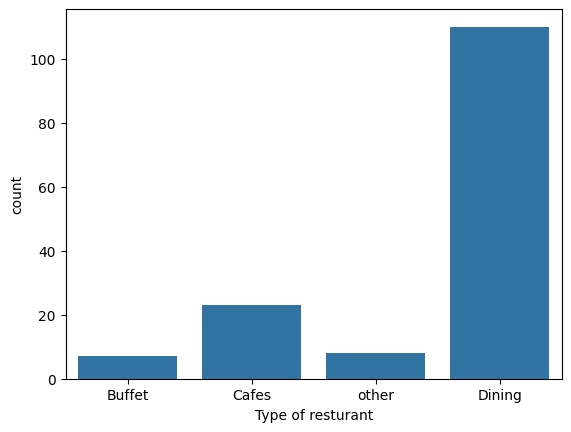

In [7]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of resturant")

# CONCLUSION: The majority of the restaurants fall into the dining category.

# Dining restaurants are preferred by a larger number of individuals.

Text(0.5, 0, 'Type of restaurant')

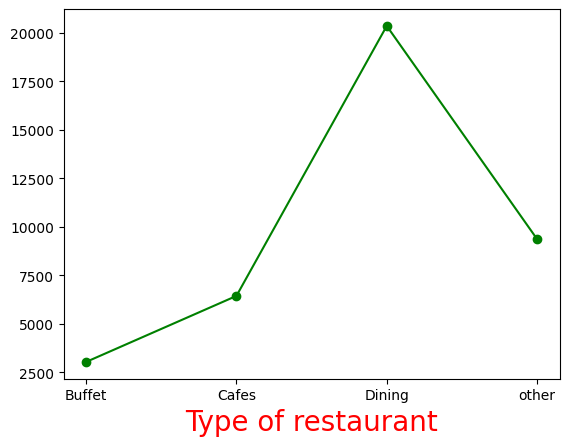

In [8]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame(({'votes':grouped_data}))
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of restaurant",c="red",size=20)

# The majority of restaurants received ratings

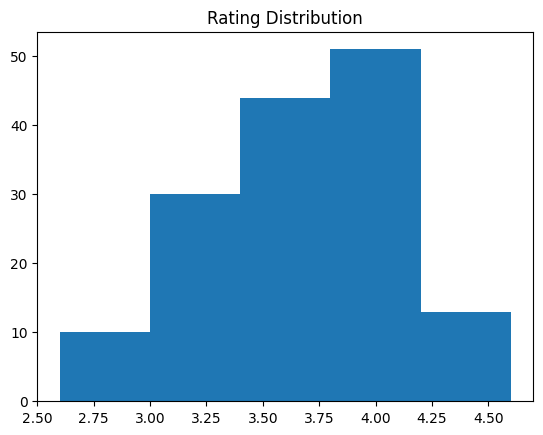

In [9]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Rating Distribution")
plt.show()

# CONCLUSION: The majority of restaurants received ratings ranging from 3.5 to 4.

# Average order Spending by couples.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

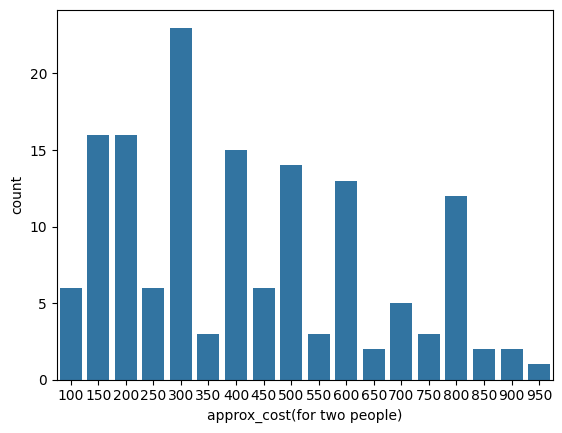

In [10]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.



# Wheather online orders receive higher ratings than offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

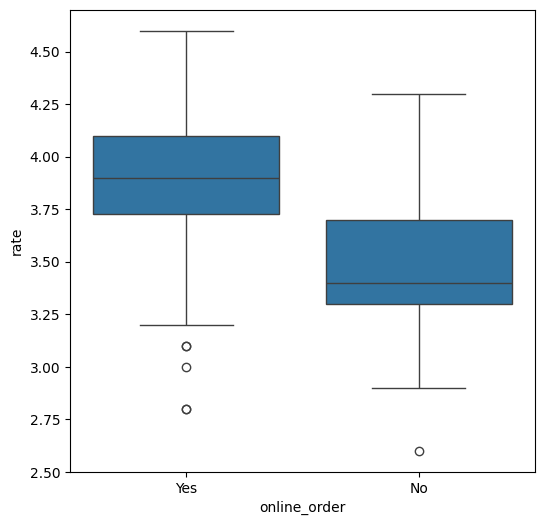

In [11]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

# COCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

# Which type of restaurant received more offline orders?

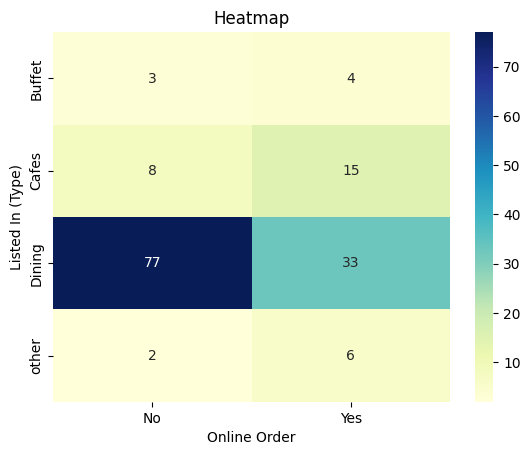

In [12]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heatmap") 
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

# CONCLUSION; Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders.This suggests that clients prefer to place orders in person at reataurants, but prefer online ordering at cafes.